In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data=pd.read_csv('DigitalAd_dataset.csv')
data.head()

,Age,Salary,Status
0,18,82000,0
1,29,80000,0
2,47,25000,1
3,45,26000,1
4,46,28000,1


In [3]:
data.shape

(400, 3)

In [4]:
data['Status'].value_counts()

0    257
1    143
Name: Status, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Salary'>

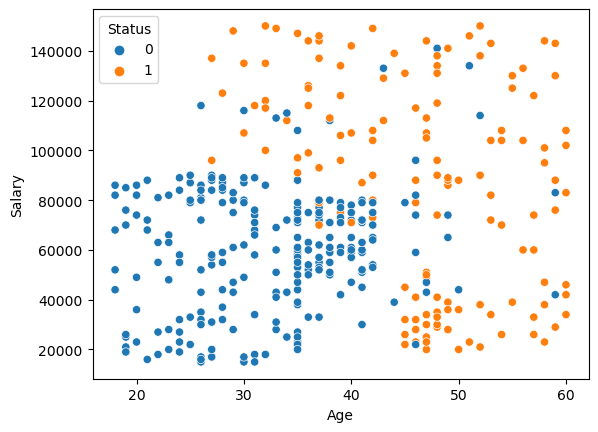

In [5]:
sns.scatterplot(x='Age',y='Salary',hue='Status',data=data)

In [6]:
x=data.drop(columns='Status')
features=x.columns
y=data['Status']
x[:5],y[:5]

(   Age  Salary
 0   18   82000
 1   29   80000
 2   47   25000
 3   45   26000
 4   46   28000,
 0    0
 1    0
 2    1
 3    1
 4    1
 Name: Status, dtype: int64)

In [7]:
x=np.array(x)
y=np.array(y)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape

((280, 2), (120, 2))

In [9]:
def z_score(xj):
    return (xj-np.mean(xj))/np.std(xj)

In [10]:
x_train_norm=np.zeros(x_train.shape)
x_test_norm=np.zeros(x_test.shape)
for j in range(2):
    x_train_norm[:,j]=z_score(x_train[:,j])
    x_test_norm[:,j]=z_score(x_test[:,j])

distribution of features before normalization


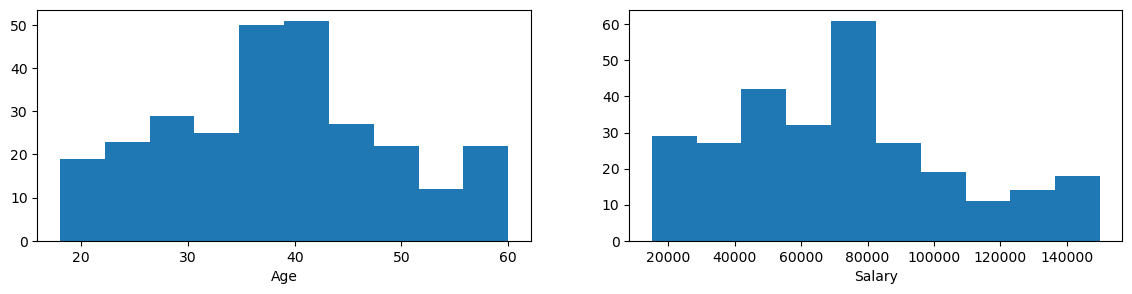

In [11]:
print('distribution of features before normalization')
plt.figure(figsize=(14,3))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.hist(x_train[:,i])
    plt.xlabel(features[i])

distribution of features after normalization


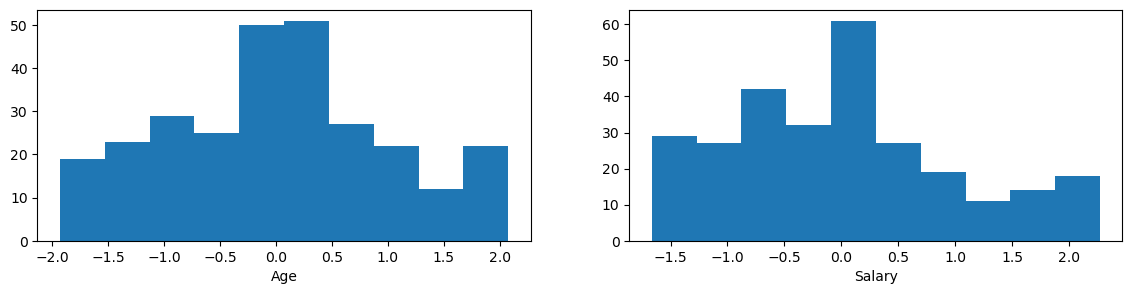

In [12]:
print('distribution of features after normalization')
plt.figure(figsize=(14,3))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.hist(x_train_norm[:,i])
    plt.xlabel(features[i])

In [13]:
x_train[:5],x_train_norm[:5]

(array([[    34, 115000],
        [    35,  53000],
        [    27, 137000],
        [    53,  34000],
        [    26,  72000]], dtype=int64),
 array([[-0.40566637,  1.2505183 ],
        [-0.31021546, -0.55720904],
        [-1.07382273,  1.89196993],
        [ 1.40790091, -1.11119   ],
        [-1.16927364, -0.00322808]]))

### Sigmoid function
$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)\tag{1}$$
$$g(z) = \frac{1}{1+e^{-z}}\tag{2}$$
<a name='ex-04'></a>
- We interpret the output of the model ($f(x^{(i)})$) as the probability that $y^{(i)}=1$ given $x^{(i)}$ and parameterized by $w$.

  if $f(x^{(i)}) >= 0.5$, predict $y^{(i)}=1$
  
  if $f(x^{(i)}) < 0.5$, predict $y^{(i)}=0$
### Cost function for logistic regression
$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{3}$$

where
* m is the number of training examples in the dataset
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is - 

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{4}$$
<a name="2.5"></a>
### Gradient for logistic regression

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously

<a name='ex-03'></a>

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{6}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{7}
$$
*  n is the number of features

    
*  $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label

In [14]:
class LogisticRegression:
    def __init__(self):
        self.w=None
        self.b=None
    def compute_cost(self,x,y,w,b):
        m=x.shape[0]
        total_cost=0
        for i in range(m):
            f_wb_i=self.sigmoid(x[i],w,b)
            loss_i=y[i]*np.log(f_wb_i)+(1-y[i])*np.log(1-f_wb_i)
            total_cost+=loss_i
        total_cost/=-m
        return total_cost
    def compute_gradient(self,x,y,w,b):
        m,n=x.shape
        dj_dw,dj_db=np.zeros(n),0
        for i in range(m):
            f_wb_i=self.sigmoid(x[i],w,b)
            dj_db_i=(f_wb_i-y[i])
            dj_db+=dj_db_i
            for j in range(n):
                dj_dw_ij=(f_wb_i-y[i])*x[i][j]
                dj_dw[j]+=dj_dw_ij
        dj_db/=m
        dj_dw/=m
        return dj_dw,dj_db
    def gradient_descent(self,x,y,alpha=1e-2,num_iters=10**4):
        n=x.shape[1]
        self.w=np.zeros(n)
        self.b=0
        J,it=[],[]
        for i in range(num_iters):
            dj_dw,dj_db=self.compute_gradient(x,y,self.w,self.b)
            self.w=self.w-alpha*dj_dw
            self.b=self.b-alpha*dj_db
            cost=self.compute_cost(x,y,self.w,self.b)
            J.append(cost)
            it.append(i)
        plt.plot(it,J)
        plt.xlabel('number of iterations')
        plt.ylabel('cost')
        plt.title('learning curve')
    def sigmoid(self,x,w,b):
        z=np.dot(x,w)+b
        g=1/(1+np.exp(-z))
        return g
    def predict(self,x,w,b):
        m=x.shape[0]
        p=np.zeros(m)
        for i in range(m):
            f_wb_i=self.sigmoid(x[i],w,b)
            p[i]=1 if f_wb_i>=0.5 else 0
        return p

In [15]:
def metrics(y_true,y_pred):
    print(f'accuracy = {np.mean(y_true==y_pred)}')

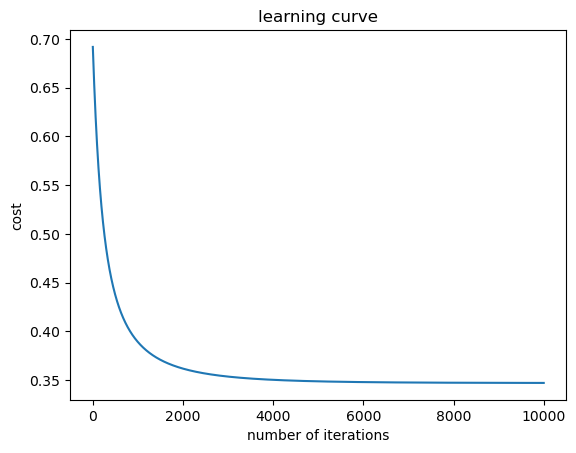

In [16]:
model=LogisticRegression()
model.gradient_descent(x_train_norm,y_train)
w,b=model.w,model.b
y_pred=model.predict(x_test_norm,w,b)

In [17]:
metrics(y_test,y_pred)

accuracy = 0.8833333333333333


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
clf=LogisticRegression()
clf.fit(x_train,y_train)
y_pred_clf=clf.predict(x_test)
print('Logistic Regression withour normalization')
print(f'accuracy = {accuracy_score(y_test,y_pred_clf)}')

Logistic Regression withour normalization
accuracy = 0.6916666666666667


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scalar=StandardScaler()
x_s_train=scalar.fit_transform(x_train)
x_s_test=scalar.fit_transform(x_test)
clf2=LogisticRegression()
clf2.fit(x_s_train,y_train)
y_pred_clf2=clf2.predict(x_s_test)
print('Logistic Regression with normalization')
print(f'accuracy = {accuracy_score(y_test,y_pred_clf2)}')

Logistic Regression with normalization
accuracy = 0.8833333333333333
